# Credit Card Default

## Introduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
default_of_credit_card_clients = fetch_ucirepo(id=350) 
  
# data (as pandas dataframes) 
X = default_of_credit_card_clients.data.features 
y = default_of_credit_card_clients.data.targets 
  
# # metadata 
# print(default_of_credit_card_clients.metadata) 
  
# # variable information 
# print(default_of_credit_card_clients.variables) 

In [3]:
default_of_credit_card_clients.metadata

{'uci_id': 350,
 'name': 'Default of Credit Card Clients',
 'repository_url': 'https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients',
 'data_url': 'https://archive.ics.uci.edu/static/public/350/data.csv',
 'abstract': "This research aimed at the case of customers' default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods.",
 'area': 'Business',
 'tasks': ['Classification'],
 'characteristics': ['Multivariate'],
 'num_instances': 30000,
 'num_features': 23,
 'feature_types': ['Integer', 'Real'],
 'demographics': ['Sex', 'Education Level', 'Marital Status', 'Age'],
 'target_col': ['Y'],
 'index_col': ['ID'],
 'has_missing_values': 'no',
 'missing_values_symbol': None,
 'year_of_dataset_creation': 2009,
 'last_updated': 'Fri Mar 29 2024',
 'dataset_doi': '10.24432/C55S3H',
 'creators': ['I-Cheng Yeh'],
 'intro_paper': {'ID': 365,
  'type': 'NATIVE',
  'title': 'The comparisons of data mining techniques for the

In [4]:
from sklearn.model_selection import train_test_split

seed = 42

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed, stratify=y)

In [5]:
column_mapping = {
    "X1": "credit_amount",
    "X2": "gender",
    "X3": "education",
    "X4": "marital_status",
    "X5": "age",
    "X6": "repayment_status_sep_2005",
    "X7": "repayment_status_aug_2005",
    "X8": "repayment_status_jul_2005",
    "X9": "repayment_status_jun_2005",
    "X10": "repayment_status_may_2005",
    "X11": "repayment_status_apr_2005",
    "X12": "bill_statement_sep_2005",
    "X13": "bill_statement_aug_2005",
    "X14": "bill_statement_jul_2005",
    "X15": "bill_statement_jun_2005",
    "X16": "bill_statement_may_2005",
    "X17": "bill_statement_apr_2005",
    "X18": "previous_payment_sep_2005",
    "X19": "previous_payment_aug_2005",
    "X20": "previous_payment_jul_2005",
    "X21": "previous_payment_jun_2005",
    "X22": "previous_payment_may_2005",
    "X23": "previous_payment_apr_2005"
}

## Visualization

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

Name of the column: gender


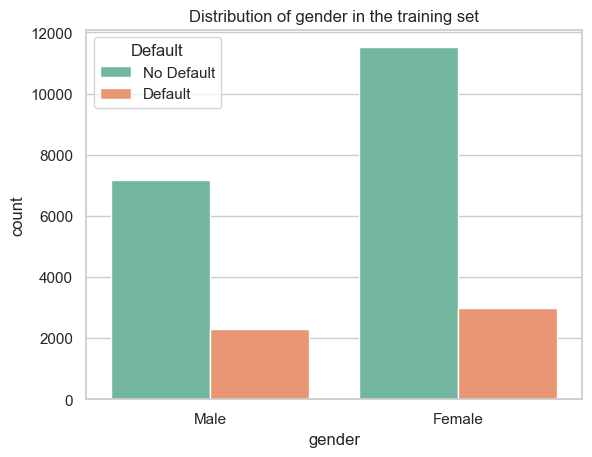

Percent of Males : 39.52%
Percent of Females : 60.48%
Default rate for Males : 0.24%
Default rate for Females : 20.65%
Number of Males: 9486
Male defaults: 2312
Male Non-default: 7174


In [ ]:
col = f"X2"
print(f"Name of the column: {column_mapping[col]}")

sns.countplot(data=X_train, x=col, palette="Set2", hue=y_train.values.flatten())
plt.title(f"Distribution of {column_mapping[col]} in the training set")
plt.xlabel(column_mapping[col])
plt.xticks(ticks=[0, 1], labels=["Male", "Female"])
plt.legend(title="Default", loc="upper left", labels=["No Default", "Default"])
plt.show()

# Output male/female ratio and their respective default rates
n_males = X_train[X_train[col] == 1].shape[0]
n_females = X_train[X_train[col] == 2].shape[0]

print(f"Percent of Males : {n_males/(n_males + n_females) * 100:.2f}%")
print(f"Percent of Females : {n_females/(n_males + n_females) * 100:.2f}%")
print(f"Default rate for Males : {y_train[X_train[col] == 1].values.sum()/n_males :.2f}%")
print(f"Default rate for Females : {y_train[X_train[col] == 2].values.sum()/n_females * 100:.2f}%")

print(f"Number of Males: {n_males}")
print(f"Male defaults: {y_train[X_train[col] == 1].values.sum()}")
print(f"Male Non-default: {y_train[X_train[col] == 1].shape[0] - y_train[X_train[col] == 1].values.sum()}")